In [127]:
import pandas as pd
import numpy as np
import jieba
import jieba.posseg as psg
import jieba.analyse
import paddle
paddle.enable_static()
jieba.enable_paddle()
import nltk
import wordcloud
import matplotlib.pyplot as plt
from imageio import imread

import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import matplotlib.colors as colors

from gensim import corpora
from gensim.models import LdaModel
from gensim.corpora import Dictionary

Paddle enabled successfully......
[2022-12-21 10:29:27,870] [   DEBUG] _compat.py:47 - Paddle enabled successfully......


In [128]:
#解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']#解决乱码问题
plt.rcParams['axes.unicode_minus'] = False #显示符号

In [129]:
#停用词与分词
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r',encoding='utf-8').readlines()]
    return stopwords


stopwords = stopwordslist('stop_words.txt')
stopwords2 = stopwordslist('stopwordsChinese.txt')

In [130]:
#查看评论数在时间上的分布
data = pd.read_csv('washed_content_info_guangzhuo(6).csv')
data.dropna(axis=0,how="any",thresh= None,subset='content',inplace=True)
data['datetime'] = '2022-'+data['month'].apply(lambda x: str(x))+'-'+data['day'].apply(lambda x: str(x))

ddd=  pd.DataFrame({'time0':data['datetime'].value_counts().index, 'count':data['datetime'].value_counts().values})
ddd['time']=pd.to_datetime(ddd['time0'])

ddd = ddd.sort_values(by='time')
ddd.reset_index(drop=True,inplace=True)

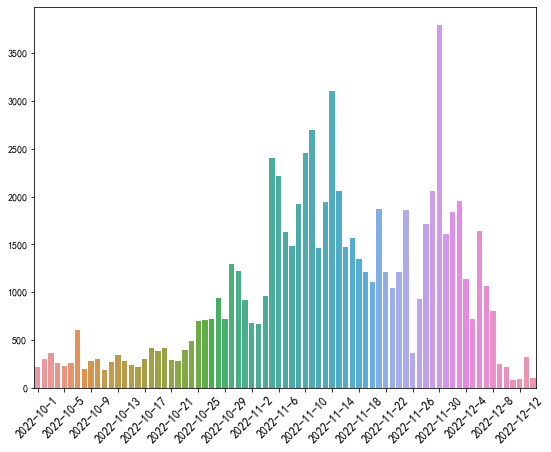

In [131]:
#查看评论数在时间上的分布
fig = plt.figure(figsize=(9, 7))
sns.barplot(y=ddd['count'].values, x=ddd['time0'].values )
plt.xticks(range(0,75,4), ddd.iloc[range(0,75, 4), 0], rotation=45, fontsize=12)
plt.savefig('评论总数在时间上的分布情况.png')#.png  .pdf


In [111]:
#按照时间窗分析，这里使用15天作为时间窗
data0 = pd.DataFrame(data, columns=[ 'content','user_name', 'month','day'])

data0.dropna(axis=0,how="any",thresh= None,subset='content',inplace=True)
data0.info()

data1= data0[(data0['month']==10) & (data0['day'] <=15 )  & (data0['day'] >=1 )]
data2= data0[(data0['month']==10) & (data0['day'] <=31 )  & (data0['day'] >15 )]
data3= data0[(data0['month']==11) & (data0['day'] <=15 )  & (data0['day'] >=1 )]
data4= data0[(data0['month']==11) & (data0['day'] <=30 )  & (data0['day'] >15 )]
data5= data0[(data0['month']==12) & (data0['day'] <=15 )  & (data0['day'] >=1 )]

data1.reset_index(drop=True,inplace=True)
data2.reset_index(drop=True,inplace=True)
data3.reset_index(drop=True,inplace=True)
data4.reset_index(drop=True,inplace=True)
data5.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74894 entries, 0 to 78827
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    74894 non-null  object
 1   user_name  74894 non-null  object
 2   month      74894 non-null  int64 
 3   day        74894 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.9+ MB


In [112]:
#分词函数
def make_text(data):
    text =','.join([i for i in data['content']])
    words = jieba.cut(text)
    lines = []
    for word in words:
        if len(word) >= 2:
            lines.append(word)

    lines2 = []
    for x in lines:
        if (x not in stopwords) &(x not in stopwords2):
            lines2.append(x)

        
    # 6.获取词频最多的50个词
    result = Counter(lines2).most_common(50)
    #print(result)
    content = ' '.join(lines2)
    return lines2, result,  content

In [113]:
#新分词函数
def make_text_new(data):
    text =','.join([i for i in data['content']])
    words = jieba.cut(text)
    lines = []
    for word in words:
        if len(word) >= 2:
            lines.append(word)

    lines2 = []
    for x in lines:
        if (x not in stopwords) &(x not in stopwords2) &(x not in 
        ['疫情', '广州', '海珠', '花都区','海珠区', '核酸', '检测', '措施', '隔离', '感染者', '防控', '无症状', '确诊', '新增', '希望','病例','10'
        ,'输入', '本土', '境外', '肺炎', '深圳', '新冠', '做好', '广州市', '全省', '采样', '13', '24', '12', '11', '报告', '2022'
        ,'冠状病毒', '新型', '情况', '区域', '街道', '社区', '视频', '输入', '肺炎', '新闻', '微博', '真的', '12', '11', '报告', '2022'
        ,'新华','48','居住']):
            lines2.append(x)

        
    # 6.获取词频最高的50个词
    result = Counter(lines2).most_common(50)
    #print(result)
    content = ' '.join(lines2)
    return lines2, result,  content

In [114]:
#生成词云
def create_word_cloud(content, i):
    wc = WordCloud(font_path='C:\WINDOWS\FONTS\simhei.ttf',
                    colormap = colors.ListedColormap(['#EE0000','#a32626','#eedf26','#8E2323','#f72d2d']),
                    background_color='white',
                    max_words=200,
                    width=2000,
                    height=1200)
    word_cloud = wc.generate(content)
    word_cloud.to_file(str(i)+'.jpg')
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

<>:3: DeprecationWarning: invalid escape sequence \W
<>:3: DeprecationWarning: invalid escape sequence \W
D:\TEMP1\ipykernel_8124\1202246674.py:3: DeprecationWarning: invalid escape sequence \W
  wc = WordCloud(font_path='C:\WINDOWS\FONTS\simhei.ttf',


In [115]:
list15 = [data1, data2, data3, data4, data5]

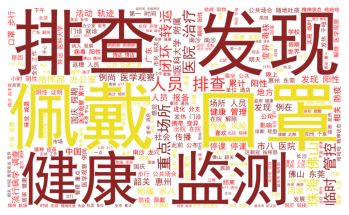

In [117]:
lines, result,  content = make_text_new(data1)
create_word_cloud(content, 1)

In [118]:
jieba.analyse.extract_tags(content,topK=10)

['人员', '南沙', '阳性', '管控', '韶关', '医学观察', '健康', '30', '报备', '口罩']

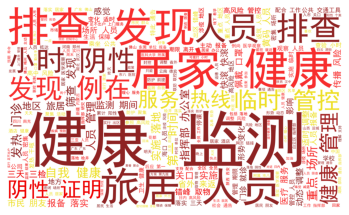

In [119]:
lines, result,  content = make_text_new(data2)
create_word_cloud(content, 2)

In [120]:
jieba.analyse.extract_tags(content,topK=10)

['人员', '健康', '管控', '居家', '白云区', '黄码', '报备', '通告', '监测', '管理']

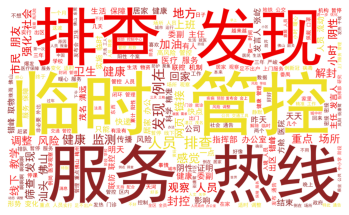

In [121]:
lines, result,  content = make_text_new(data3)
create_word_cloud(content, 3)

In [122]:
jieba.analyse.extract_tags(content,topK=10)

['管控', '人员', '居家', '通告', '防疫', '服务', '白云区', '风险', '健康', '荔湾区']

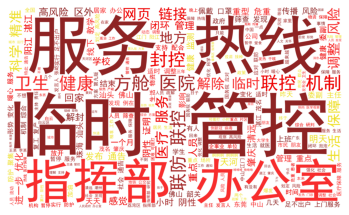

In [123]:
lines, result,  content = make_text_new(data4)
create_word_cloud(content, 4)

In [124]:
jieba.analyse.extract_tags(content,topK=10)

['管控', '通告', '人员', '高风险', '防疫', '服务', '风险', '热线', '居家', '17']

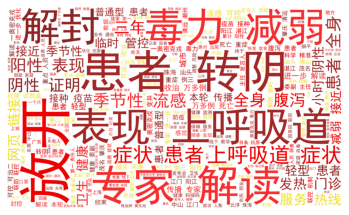

In [125]:
lines, result,  content = make_text_new(data5)
create_word_cloud(content, 5)

In [126]:
jieba.analyse.extract_tags(content,topK=10)

['患者', '感染', '症状', '重症', '发布会', '健康', '放开', '奥密克戎', '疫苗', '居家']